# Misinformation is one of the biggest issues in today's society
___________________________      And Fake news is a real problem  _______________________________________ 

### Importing the Libraries 

In [125]:
pip install pyldavis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=bfd95318d25f8db002391e9c68f840128b16fad518652e05883e50cd21e33007
  Stored in directory: c:\users\x1doo\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=93d979166d12be57430453eeefe54368caaf51a0a7341b964c656158d62b1d2e
  Stored in directory: c:\users\x1doo\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfull

In [2]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\x1doo\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_3




conda-4.10.3         | 3.1 MB    |            |   0% 
conda-4.10.3         | 3.1 MB    |            |   1% 
conda-4.10.3         | 3.1 MB    | 7 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS 
stpwords = set(STOPWORDS)
#import pyplot.express as px 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim import corpora, models

C:\Users\x1doo\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
df_true = pd.read_csv('True.csv') 
df_fake = pd.read_csv('Fake.csv')  

In [4]:
#df_true.head()
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df = pd.concat([df_true[:5000], df_fake[:5000]]) 
df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
4995,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016"
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016"
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016"
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016"


In [6]:
df.shape

(10000, 4)

## Data Cleaning

In [7]:
df.isnull().sum() 

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df.duplicated().value_counts()  

False    9965
True       35
dtype: int64

In [9]:
df.drop_duplicates(keep=False,inplace=True)
df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
4995,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016"
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016"
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016"
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016"


In [10]:
df.nunique()

title      9932
text       9940
subject       2
date        787
dtype: int64

In [11]:
df.subject.unique()

array(['politicsNews', 'News'], dtype=object)

In [12]:
# Combine "title" and "text" in single column
df['original'] = df['title'] + ' ' + df['text']
df.head() 

,title,text,subject,date,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...


In [13]:
df['original'][0]

0    As U.S. budget fight looms, Republicans flip t...
0     Donald Trump Sends Out Embarrassing New Year’...
Name: original, dtype: object

In [14]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [15]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
from collections import Counter
df['temp_list']=df['text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['temp_list'] for word in li])
temp_1=pd.DataFrame(top.most_common(20))
temp_1.columns=["most_common_words","frequency"]
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,the,189252
1,to,122967
2,of,87369
3,and,85011
4,a,84330
5,in,62518
6,that,57294
7,Trump,43835
8,on,41630
9,is,39135


In [17]:
# To remove stopwords and words with length less than 3
'''
Write a function to perform the pre processing steps on the entire dataset
'''

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
# Now lets apply the defined function of "original" text in our data
df['clean'] = df['original'].apply(preprocess) 
df

,title,text,subject,date,original,temp_list,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...","[WASHINGTON, (Reuters), -, The, head, of, a, c...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,"[WASHINGTON, (Reuters), -, Transgender, people...","[militari, accept, transgend, recruit, monday,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,"[WASHINGTON, (Reuters), -, The, special, couns...","[senior, republican, senat, mueller, washingto..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...","[russia, probe, help, australian, diplomat, wa..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...","[trump, want, postal, servic, charg, amazon, s..."
...,...,...,...,...,...,...,...
4995,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016",FBI Warns Republicans: Do Not Leak Clinton Em...,"[It, s, no, secret, Republicans, are, salivati...","[warn, republican, leak, clinton, email, file,..."
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",Justice Department Announces It Will No Longe...,"[Republicans, are, about, to, lose, a, huge, s...","[justic, depart, announc, longer, privat, pris..."
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,"[A, pawn, working, for, Donald, Trump, claimed...","[watch, cupp, destroy, trump, advis, fantasi, ..."
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",WATCH: Fox Hosts Claim Hillary Has Brain Dama...,"[Fox, News, is, desperate, to, sabotage, Hilla...","[watch, host, claim, hillari, brain, damag, we..."


In [19]:
print(df['clean'][0])  

0    [budget, fight, loom, republican, flip, fiscal...
0    [donald, trump, send, embarrass, year, messag,...
Name: clean, dtype: object


# remove punctuation marks

In [20]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    text= re.sub('\[[^]]*\]', '', text)
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    #removal of html tags
    review =re.sub(r'<.*?>',' ',text) 
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = text.lower()
    text_tokens =word_tokenize(text)

    text_clean = []
    for word in  text_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            lem_word =lemmatizer.lemmatize(word)  # lemmitiging word
            text_clean.append(lem_word)
    text_mod=[i for i in text_clean if len(i)>2]
    text_clean=' '.join(text_mod)
    return  text_clean

In [21]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [22]:
print(df['clean_text'])

0       washington reuters head conservative republica...
1       washington reuters transgender people allowed ...
2       washington reuters special counsel investigati...
3       washington reuters trump campaign adviser geor...
4       seattle washington reuters president donald tr...
                              ...                        
4995    secret republican salivating find something an...
4996    republican lose huge source funding justice de...
4997    pawn working donald trump claimed woman respec...
4998    fox news desperate sabotage hillary clinton ca...
4999    donald trump campaign continues sink deeper se...
Name: clean_text, Length: 9943, dtype: object


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [24]:
# Total number of words in dataset 
list_words = []
for i in df.clean:
    for j in i:
        list_words.append(j)
print ('Total number of words are: {}'.format(len(list_words)))

Total number of words are: 2057610


In [25]:
#total unique words
total_unique_words = len(list(set(list_words)))
total_unique_words  

36910

In [26]:
# Convert words in "clean" column to a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head(3) 

,title,text,subject,date,original,temp_list,clean,clean_text,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...","[WASHINGTON, (Reuters), -, The, head, of, a, c...","[budget, fight, loom, republican, flip, fiscal...",washington reuters head conservative republica...,budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,"[WASHINGTON, (Reuters), -, Transgender, people...","[militari, accept, transgend, recruit, monday,...",washington reuters transgender people allowed ...,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,"[WASHINGTON, (Reuters), -, The, special, couns...","[senior, republican, senat, mueller, washingto...",washington reuters special counsel investigati...,senior republican senat mueller washington reu...


In [27]:
df.head(1)

,title,text,subject,date,original,temp_list,clean,clean_text,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...","[WASHINGTON, (Reuters), -, The, head, of, a, c...","[budget, fight, loom, republican, flip, fiscal...",washington reuters head conservative republica...,budget fight loom republican flip fiscal scrip...


In [28]:
# drop columns that we do not need them

df.drop(['title', 'text','date','temp_list','original','clean','clean_text'], axis=1, inplace=True)
df.drop(['subject'], axis=1, inplace=True) 
df.head() 

,clean_joined
0,budget fight loom republican flip fiscal scrip...
1,militari accept transgend recruit monday penta...
2,senior republican senat mueller washington reu...
3,russia probe help australian diplomat washingt...
4,trump want postal servic charg amazon shipment...


In [29]:
# Real news (the most common words in real news)

import re
# generate real word list
realNewsWords = [str(i) for i in df_true['title']]
realWordsString = (" ".join(realNewsWords)).lower()
realWordsString = re.sub(r'[^\w\s]', '', realWordsString) 

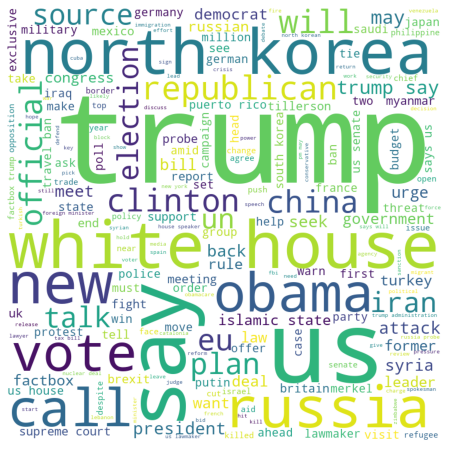

In [40]:
# Generate Word cloud
wc = WordCloud(width = 800, height = 800,
               stopwords = stpwords,
              background_color = 'white').generate(realWordsString)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc); 
plt.axis("off"); 

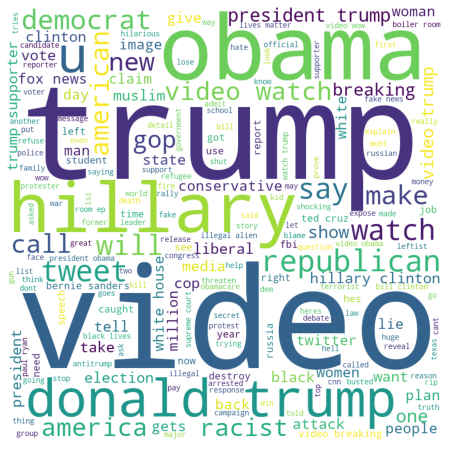

In [41]:
#Generate Fake word list
fakeNewsWords = [str(i) for i in df_fake['title']]
fakeWordsString = (" ".join
                   (fakeNewsWords)).lower()
fakeWordsString = re.sub(r'[^\w\s]', '', fakeWordsString)

# generate Word cloud
wc = WordCloud(width = 800, height = 800,
               stopwords = stpwords,
              background_color = 'white').generate(fakeWordsString)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc); 
plt.axis("off"); 

In [30]:
# Top words of the dataset 

df['clean_temp']=df['clean_joined'].apply(lambda x: str(x).split())
top=Counter([word for li in df['clean_temp'] for word in li])
temp_2=pd.DataFrame(top.most_common(20))
temp_2.columns=["common_words",'frequency']
temp_2.style.background_gradient(cmap='Blues') 

,common_words,frequency
0,trump,62142
1,say,35242
2,presid,18053
3,republican,14891
4,state,13308
5,hous,12601
6,donald,11945
7,senat,10237
8,peopl,10033
9,white,9115


In [31]:
#Generating N-Grams 
data=' '.join([sentance for sentance in df['clean_joined']]) 

In [32]:
import nltk
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
unigrams=extract_ngrams(data, 1)
bigrams= extract_ngrams(data, 2)
trigrams= extract_ngrams(data, 3)
fourgrams=extract_ngrams(data, 4) 

In [33]:
#Counting the frequency of n- grams

freq_uni = nltk.FreqDist(unigrams)
freq_bi = nltk.FreqDist(bigrams)
freq_tri = nltk.FreqDist(trigrams)
freq_four = nltk.FreqDist(fourgrams) 

In [34]:
freq_uni

FreqDist({'trump': 62142, 'say': 35242, 'presid': 18053, 'republican': 14891, 'state': 13308, 'hous': 12601, 'donald': 11945, 'senat': 10237, 'peopl': 10033, 'white': 9115, ...})

In [35]:
freq_bi

FreqDist({'donald trump': 11237, 'white hous': 6983, 'unit state': 4641, 'featur imag': 4426, 'presid donald': 3685, 'getti imag': 3129, 'washington reuter': 3058, 'trump say': 2407, 'trump administr': 2191, 'hillari clinton': 2026, ...})

In [36]:
freq_tri

FreqDist({'presid donald trump': 3677, 'donald trump realdonaldtrump': 1210, 'reuter presid donald': 1026, 'presid barack obama': 1005, 'washington reuter presid': 784, 'getti imag trump': 639, 'white hous say': 468, 'director jam comey': 432, 'nation secur advis': 425, 'featur imag screenshot': 422, ...})

# Topic modeling 

In [37]:
list_a=list(df['clean_joined'])

In [38]:
len(list_a)

9943

In [40]:
#list_a[:3]

In [106]:
# create the document-term matrix with count vectorizer
cv = CountVectorizer()
X = cv.fit_transform(list_a[:9000])
#dt = pd.DataFrame(X, columns=cv.get_feature_names())

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
processed_docs = df['clean_joined'].map(preprocess)

dictionary = gensim.corpora.Dictionary(processed_docs)

In [79]:
'''
Checking dictionary created
'''
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 action
1 administr
2 agr
3 approach
4 approv
5 arriv
6 assist
7 balloon
8 battl
9 begin
10 biggest


In [82]:
#dictionary.filter_extremestremes(no_below=15, no_above=0.1)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [84]:
#bow_corpus[20]

In [86]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 10 which we have checked in Step 2
bow_doc_20 = bow_corpus[20]

for i in range(len(bow_doc_20)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_20[i][0], 
                                                     dictionary[bow_doc_20[i][0]], 
                                                     bow_doc_20[i][1]))

Word 1 ("administr") appears 6 time.
Word 6 ("assist") appears 2 time.
Word 16 ("bring") appears 1 time.
Word 24 ("children") appears 1 time.
Word 32 ("countri") appears 8 time.
Word 50 ("donald") appears 1 time.
Word 58 ("emerg") appears 1 time.
Word 66 ("expir") appears 1 time.
Word 70 ("feder") appears 3 time.
Word 73 ("fiscal") appears 1 time.
Word 76 ("follow") appears 1 time.
Word 83 ("govern") appears 1 time.
Word 97 ("immigr") appears 1 time.
Word 104 ("issu") appears 1 time.
Word 105 ("januari") appears 1 time.
Word 107 ("late") appears 2 time.
Word 139 ("peopl") appears 1 time.
Word 140 ("percent") appears 1 time.
Word 143 ("polici") appears 1 time.
Word 145 ("presid") appears 2 time.
Word 148 ("program") appears 3 time.
Word 161 ("repr") appears 1 time.
Word 162 ("republican") appears 1 time.
Word 169 ("reuter") appears 2 time.
Word 192 ("state") appears 4 time.
Word 202 ("trump") appears 9 time.
Word 203 ("twitter") appears 1 time.
Word 204 ("unit") appears 3 time.
Word 208

In [87]:

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc) 
    break


[(0, 0.02601344188938095),
 (1, 0.03267516932678837),
 (2, 0.03000411442762427),
 (3, 0.04178761241205724),
 (4, 0.029874422636433157),
 (5, 0.046997578485518464),
 (6, 0.0833198902209298),
 (7, 0.06665576896316273),
 (8, 0.04607566251982166),
 (9, 0.02482049774668655),
 (10, 0.03833957296343624),
 (11, 0.06357754184495755),
 (12, 0.044020382884512176),
 (13, 0.03856326720748717),
 (14, 0.05847289988445695),
 (15, 0.08262700885674408),
 (16, 0.026774976111103535),
 (17, 0.20014856719783877),
 (18, 0.04188418698041275),
 (19, 0.015532666854024508),
 (20, 0.05199660706562752),
 (21, 0.030935833093089313),
 (22, 0.022408389798169063),
 (23, 0.0605860917488328),
 (24, 0.034912016322948214),
 (25, 0.04809284665626652),
 (26, 0.02061824201031064),
 (27, 0.01364054070268538),
 (28, 0.06984977946059984),
 (29, 0.07891469107369058),
 (30, 0.05420994847010624),
 (31, 0.03889328533829328),
 (32, 0.015807249804694272),
 (33, 0.029405438399662823),
 (34, 0.2849581184838691),
 (35, 0.121994395280843

# Running LDA using Bag of Words

In [56]:

tf_idf=TfidfVectorizer( 
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = nltk.corpus.stopwords.words('english')
)
tf_idf.fit(df.clean_joined)
text = tf_idf.transform(df.clean_joined)

In [58]:

from sklearn.cluster import MiniBatchKMeans 


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


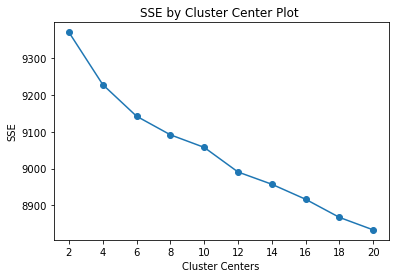

In [69]:
from sklearn.cluster import MiniBatchKMeans 

def find_optimal_clusters(df, max_k):
    iters = range(2, max_k+1, 2)
    
    sse= []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(df).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1,1) 
    ax.plot(iters, sse,marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')                
    ax.set_title('SSE by Cluster Center Plot ')    
find_optimal_clusters(text,20)

In [63]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [65]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(X)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [70]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -3073348.3018554174
Model Perplexity:  1730.1718592799573


In [108]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model,X,  cv, mds='tsne')
panel

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\x1doo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  19.263211
4       0.648955  71.707100       2        1  14.797877
7      71.019684   9.971006       3        1  14.258154
9       3.785981  33.185135       4        1  10.598460
5     -42.666500  -9.222070       5        1  10.152719
1      -3.621689 -43.526516       6        1   9.807600
2      -3.632402  -4.171708       7        1   7.767007
6     -36.584400  35.804413       8        1   4.934966
3      44.391380  50.615383       9        1   4.268264
8      40.235809 -31.591665      10        1   4.151743, topic_info=             Term          Freq         Total Category  logprob  loglift
26919       senat  10003.000000  10003.000000  Default  30.0000  30.0000
25109  republican  13616.000000  13616.000000  Default  29.0000  29.0000
30973       trump  53744.000000  53744.000000  Default  28.0000  28.0000
26438         say  32449.000000  32449.000000  Default  27.0000  27.0000
25991      russia   5841.000000   5841.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
30361        time    257.571056   6275.683215  Topic10  -5.7061  -0.0115
29869        tell    250.883794   5914.927875  Topic10  -5.7324   0.0214
12873        help    238.482897   3034.472549  Topic10  -5.7831   0.6381
23532      presid    260.582978  16694.151314  Topic10  -5.6944  -0.9783
32866        want    230.655460   4439.542778  Topic10  -5.8164   0.2243

[819 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
33         9  0.978109         abba
100        1  0.002321        abort
100        2  0.009282        abort
100        4  0.002321        abort
100        5  0.016244        abort
...      ...       ...          ...
34020      1  0.038672  yiannopoulo
34020      5  0.928124  yiannopoulo
34070      7  0.917449         yoho
34385      6  0.974446         zink
34385      7  0.013258         zink

[2862 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 8, 10, 6, 2, 3, 7, 4, 9])

In [92]:
'''
Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
'''

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.002*"lahren" + 0.001*"maddow" + 0.001*"stewart" + 0.001*"lgbtq" + 0.001*"flint" + 0.001*"tomi" + 0.001*"arpaio" + 0.001*"beck" + 0.001*"senat" + 0.001*"percent"


Topic: 1 Word: 0.003*"vote" + 0.003*"republican" + 0.002*"clinton" + 0.002*"trump" + 0.002*"hillari" + 0.002*"obama" + 0.002*"women" + 0.002*"peopl" + 0.002*"elect" + 0.002*"imag"


Topic: 2 Word: 0.003*"comey" + 0.002*"biden" + 0.002*"reilli" + 0.002*"russia" + 0.002*"israel" + 0.001*"clinton" + 0.001*"china" + 0.001*"spicer" + 0.001*"investig" + 0.001*"climat"


Topic: 3 Word: 0.003*"reid" + 0.001*"vaccin" + 0.001*"goldberg" + 0.001*"carlson" + 0.001*"joyner" + 0.001*"donnel" + 0.001*"saudi" + 0.001*"senat" + 0.000*"hous" + 0.000*"meet"


Topic: 4 Word: 0.004*"russia" + 0.003*"investig" + 0.003*"russian" + 0.003*"intellig" + 0.003*"elect" + 0.003*"clinton" + 0.003*"comey" + 0.002*"flynn" + 0.002*"hack" + 0.002*"trump"


Topic: 5 Word: 0.004*"maher" + 0.001*"waterboard" + 0.001*"shkreli" + 0.001*"yiannopoulo

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus_tfidf, dictionary=lda_model_tfidf.id2word)
vis

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.194888 -0.021137       1        1  70.253019
4     -0.109109  0.040283       2        1  15.899792
2     -0.030290  0.002898       3        1   2.667534
9     -0.009491  0.005409       4        1   2.201924
7     -0.006259 -0.029822       5        1   1.931794
6      0.067034  0.004913       6        1   1.436945
0      0.060120 -0.008084       7        1   1.434711
3      0.063172  0.001028       8        1   1.395016
5      0.088045 -0.000201       9        1   1.391986
8      0.071666  0.004713      10        1   1.387280, topic_info=                Term        Freq       Total Category  logprob  loglift
800  realdonaldtrump  117.000000  117.000000  Default  30.0000  30.0000
181            senat  121.000000  121.000000  Default  29.0000  29.0000
366          clinton  172.000000  172.000000  Default  28.0000  28.0000
202            trump  166.000000  166.000000  Default  27.0000  27.0000
423           russia   94.000000   94.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
246           depart    0.427251   52.843562  Topic10  -7.8166  -0.5399
488          russian    0.430725   70.754477  Topic10  -7.8085  -0.8237
169           reuter    0.411236   35.296765  Topic10  -7.8548  -0.1746
181            senat    0.418658  121.737871  Topic10  -7.8369  -1.3947
204             unit    0.404920   75.070072  Topic10  -7.8703  -0.9447

[648 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
8787       1  0.648433        abadi
2613       1  0.964408        abort
2614       2  0.881093        abram
1642       1  0.928250       afford
1642       2  0.027301       afford
...      ...       ...          ...
4432       1  0.317464       yellen
4432       2  0.634927       yellen
18052      9  0.921656  yiannopoulo
2521       1  0.939591       youtub
11859      5  0.953555         zika

[804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 10, 8, 7, 1, 4, 6, 9])

In [126]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5358937382698059	 
Topic: 0.003*"vote" + 0.003*"republican" + 0.002*"clinton" + 0.002*"trump" + 0.002*"hillari" + 0.002*"obama" + 0.002*"women" + 0.002*"peopl" + 0.002*"elect" + 0.002*"imag"

Score: 0.4604044258594513	 
Topic: 0.004*"russia" + 0.003*"investig" + 0.003*"russian" + 0.003*"intellig" + 0.003*"elect" + 0.003*"clinton" + 0.003*"comey" + 0.002*"flynn" + 0.002*"hack" + 0.002*"trump"


C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
unseen_document = "My favorite sports activities are running and swimming."

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.4808635413646698	 Topic: 0.003*"vote" + 0.003*"republican" + 0.002*"clinton" + 0.002*"trump" + 0.002*"hillari"
Score: 0.3577691614627838	 Topic: 0.004*"russia" + 0.003*"investig" + 0.003*"russian" + 0.003*"intellig" + 0.003*"elect"
Score: 0.020174020901322365	 Topic: 0.002*"recount" + 0.002*"hamilton" + 0.002*"realdonaldtrump" + 0.002*"kaepernick" + 0.002*"vote"
Score: 0.020171726122498512	 Topic: 0.003*"comey" + 0.002*"biden" + 0.002*"reilli" + 0.002*"russia" + 0.002*"israel"
Score: 0.020170964300632477	 Topic: 0.003*"baldwin" + 0.003*"tapper" + 0.002*"palin" + 0.002*"china" + 0.002*"bannon"
Score: 0.020170222967863083	 Topic: 0.003*"reid" + 0.001*"vaccin" + 0.001*"goldberg" + 0.001*"carlson" + 0.001*"joyner"
Score: 0.02017015404999256	 Topic: 0.004*"maher" + 0.001*"waterboard" + 0.001*"shkreli" + 0.001*"yiannopoulo" + 0.000*"merriam"
Score: 0.02017010562121868	 Topic: 0.001*"seanhann" + 0.001*"china" + 0.001*"stein" + 0.001*"korea" + 0.001*"oliv"
Score: 0.020170098170638084	

C:\Users\x1doo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
